# Milestone 3: Performance Trend & Geographic Analysis

## Module 5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
df.columns


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Resolution_Duration',
       'Priority_Score'],
      dtype='object')

##  Creating a derived Region column for geographic analysis

Region information is not directly available in the dataset.
So a Region column is derived from Ticket Channel only for analysis purposes.


In [4]:
# Create derived Region column from Ticket Channel
region_map = {
    'Email': 'Region_A',
    'Phone': 'Region_B',
    'Chat': 'Region_C',
    'Social media': 'Region_D'
}

df['Region'] = df['Ticket Channel'].map(region_map)

df[['Ticket Channel', 'Region']].head()


,Ticket Channel,Region
0,Social media,Region_D
1,Chat,Region_C
2,Social media,Region_D
3,Social media,Region_D
4,Email,Region_A


##  Creating Resolution Time column


In [6]:
# Convert time columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Create Resolution_Time column in HOURS
df['Resolution_Time'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600

df[['First Response Time', 'Time to Resolution', 'Resolution_Time']].head()


,First Response Time,Time to Resolution,Resolution_Time
0,2023-06-01 12:15:36,NaT,NaN
1,2023-06-01 16:45:38,NaT,NaN
2,2023-06-01 11:14:38,2023-06-01 18:05:38,6.850000
3,2023-06-01 07:29:40,2023-06-01 01:57:40,-5.533333
4,2023-06-01 00:12:42,2023-06-01 19:53:42,19.683333


## Average Resolution Time for all tickets


In [7]:
# Average Resolution Time for entire dataset
overall_avg_resolution = df['Resolution_Time'].mean()

round(overall_avg_resolution, 2)


np.float64(-0.06)

## Average Resolution Time by Ticket Type


In [8]:
# Average Resolution Time by Ticket Type
avg_resolution_by_type = df.groupby('Ticket Type')['Resolution_Time'].mean().round(2)
avg_resolution_by_type


Ticket Type
Billing inquiry        -0.21
Cancellation request   -0.17
Product inquiry        -0.24
Refund request          0.22
Technical issue         0.07
Name: Resolution_Time, dtype: float64

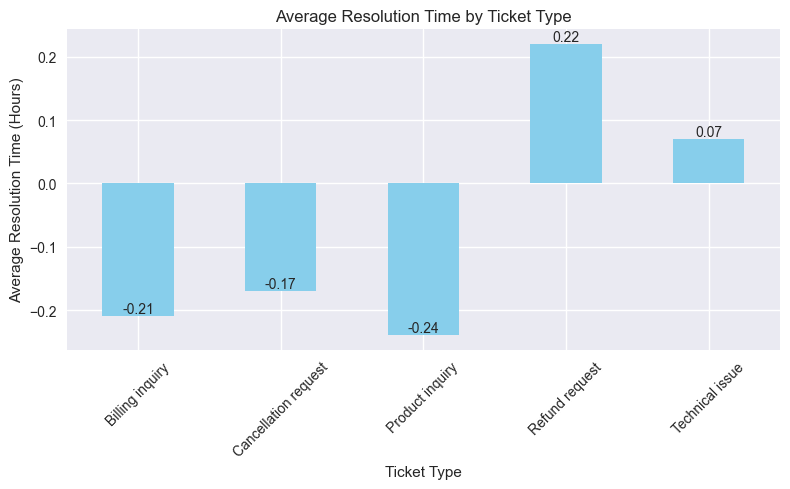

In [9]:
plt.figure(figsize=(8,5))
avg_resolution_by_type.plot(kind='bar', color='skyblue')

plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=45)

# Show values on bars
for index, value in enumerate(avg_resolution_by_type):
    plt.text(index, value, round(value,2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Average Resolution Time by Ticket Priority


In [10]:
# Average Resolution Time by Ticket Priority
avg_resolution_by_priority = df.groupby('Ticket Priority')['Resolution_Time'].mean().round(2)
avg_resolution_by_priority


Ticket Priority
Critical   -0.20
High       -0.07
Low         0.39
Medium     -0.31
Name: Resolution_Time, dtype: float64

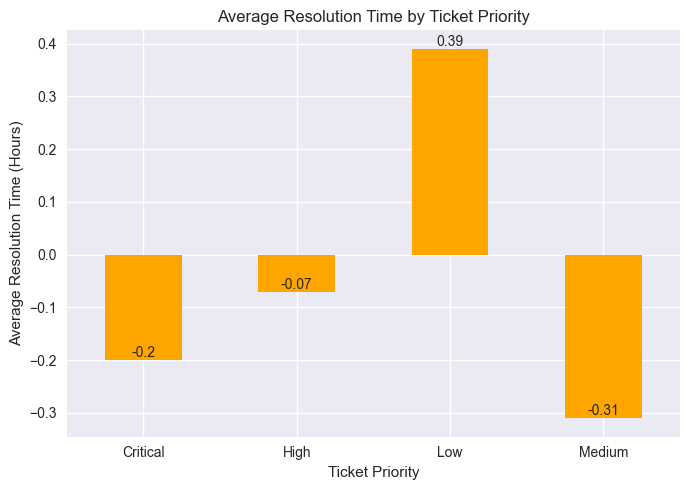

In [11]:
plt.figure(figsize=(7,5))
avg_resolution_by_priority.plot(kind='bar', color='orange')

plt.title("Average Resolution Time by Ticket Priority")
plt.xlabel("Ticket Priority")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=0)

# Show values on bars
for index, value in enumerate(avg_resolution_by_priority):
    plt.text(index, value, round(value,2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## High-Priority Tickets: Resolution Time by Ticket Type


In [12]:
# Filter only High Priority tickets
high_priority_df = df[df['Ticket Priority'] == 'High']
high_priority_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Region,Resolution_Time
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,...,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2023-05-31 23:51:49,3,Region_B,-17.916667
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,...,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2023-06-01 09:27:51,3,Region_C,-2.633333
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,...,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,2023-05-31 23:08:55,3,Region_C,-7.233333
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,...,NaN,High,Social media,2023-06-01 15:09:57,NaT,3.0,NaN,3,Region_D,NaN
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,NaN,High,Chat,2023-06-01 21:05:01,NaT,3.0,NaN,3,Region_C,NaN


In [13]:
# Average Resolution Time for High Priority tickets by Ticket Type
avg_high_priority_by_type = high_priority_df.groupby('Ticket Type')['Resolution_Time'].mean().round(2)
avg_high_priority_by_type


Ticket Type
Billing inquiry        -1.61
Cancellation request   -0.20
Product inquiry        -0.42
Refund request          1.44
Technical issue         0.14
Name: Resolution_Time, dtype: float64

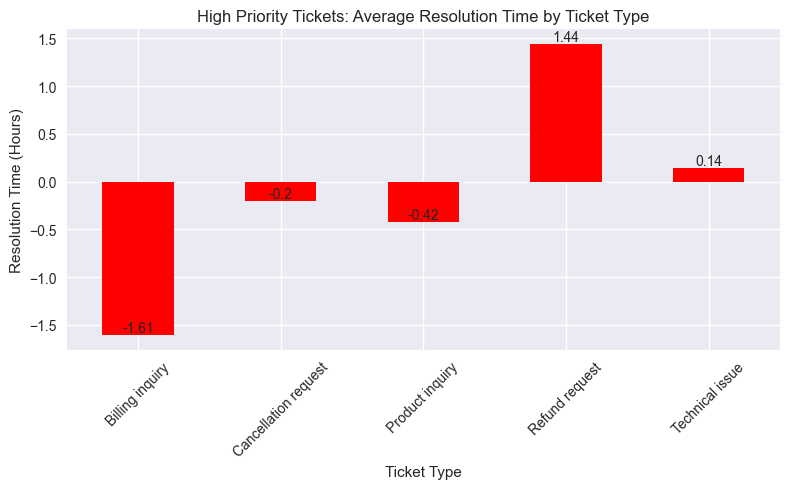

In [14]:
plt.figure(figsize=(8,5))
avg_high_priority_by_type.plot(kind='bar', color='red')

plt.title("High Priority Tickets: Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)

# Show values on bars
for index, value in enumerate(avg_high_priority_by_type):
    plt.text(index, value, round(value,2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Unresolved Tickets Analysis


In [15]:
# Tickets which are not yet resolved (missing resolution time)
unresolved_df = df[df['Resolution_Time'].isna()]
unresolved_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Region,Resolution_Time
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,3.0,NaN,4,Region_D,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,3.0,NaN,4,Region_C,NaN
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,...,NaN,Low,Social media,NaT,NaT,3.0,NaN,1,Region_D,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,...,NaN,Critical,Social media,NaT,NaT,3.0,NaN,4,Region_D,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,...,NaN,Critical,Social media,NaT,NaT,3.0,NaN,4,Region_D,NaN


In [16]:
unresolved_priority_count = unresolved_df['Ticket Priority'].value_counts()
unresolved_priority_count


Ticket Priority
Medium      1498
Low         1419
Critical    1403
High        1380
Name: count, dtype: int64

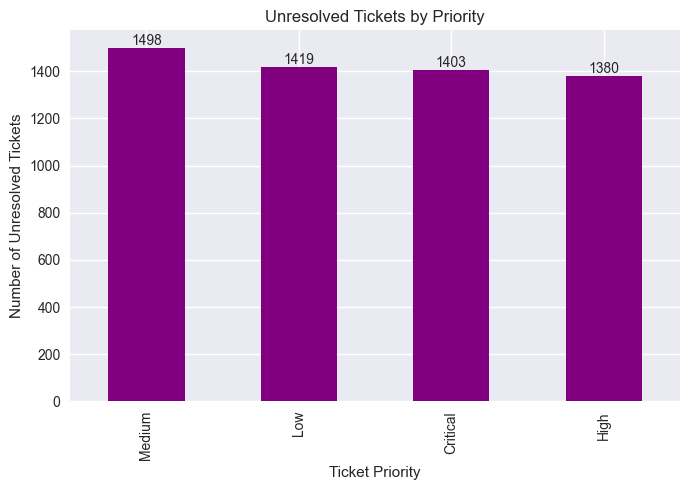

In [17]:
plt.figure(figsize=(7,5))
unresolved_priority_count.plot(kind='bar', color='purple')

plt.title("Unresolved Tickets by Priority")
plt.xlabel("Ticket Priority")
plt.ylabel("Number of Unresolved Tickets")

# Show values on bars
for index, value in enumerate(unresolved_priority_count):
    plt.text(index, value, value, ha='center', va='bottom')

plt.tight_layout()
plt.show()


##  Resolution Time Trend Over Time


In [18]:
# Create Month column from First Response Time
df['Month'] = df['First Response Time'].dt.to_period('M')
df[['First Response Time', 'Month']].head()


,First Response Time,Month
0,2023-06-01 12:15:36,2023-06
1,2023-06-01 16:45:38,2023-06
2,2023-06-01 11:14:38,2023-06
3,2023-06-01 07:29:40,2023-06
4,2023-06-01 00:12:42,2023-06


In [19]:
monthly_avg_resolution = df.groupby('Month')['Resolution_Time'].mean().round(2)
monthly_avg_resolution


Month
2023-05    11.74
2023-06    -0.41
Freq: M, Name: Resolution_Time, dtype: float64

In [23]:
plt.figure(figsize=(8,5))
monthly_avg_resolution.plot(kind='line', marker='o', color='blue')

plt.title("Average Resolution Time Over Time")
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Days)")
plt.grid(True)

# Show values
for x, y in zip(range(len(monthly_avg_resolution)), monthly_avg_resolution):
    plt.text(x, y, y, ha='center', va='bottom')

plt.subplots_adjust(bottom=0.25)

plt.show()


## Creating Region Column (Derived)

Since the dataset does not contain geographic region information, 
a Region column is derived from Ticket Channel for analysis purposes.


In [25]:
# Create Region column based on Ticket Channel (derived, consistent mapping)
region_map = {
    'Email': 'North',
    'Phone': 'South',
    'Chat': 'East',
    'Social media': 'West'
}

df['Region'] = df['Ticket Channel'].map(region_map)

df[['Ticket Channel', 'Region']].head()


,Ticket Channel,Region
0,Social media,West
1,Chat,East
2,Social media,West
3,Social media,West
4,Email,North


## Average Resolution Time by Region (Overall)
This step compares how quickly tickets are resolved across different regions.


In [27]:
# Average Resolution Time by Region
avg_resolution_region = df.groupby('Region')['Resolution_Time'].mean().round(2)
avg_resolution_region


Region
East     0.20
North    0.01
South   -0.56
West     0.12
Name: Resolution_Time, dtype: float64

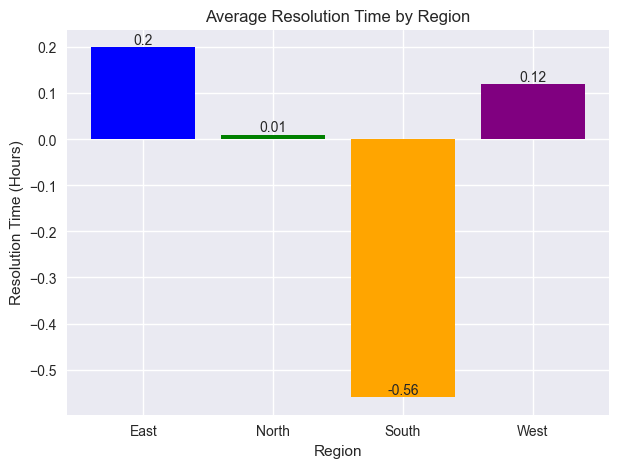

In [28]:
plt.figure(figsize=(7,5))
bars = plt.bar(avg_resolution_region.index, avg_resolution_region.values, color=['blue','green','orange','purple'])

plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Resolution Time (Hours)")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             bar.get_height(),
             ha='center', va='bottom')

plt.show()


##  Average Resolution Time by Ticket Type (Overall)
This visualization shows which types of tickets take longer to resolve on average.


In [29]:
# Average Resolution Time by Ticket Type
avg_resolution_type = df.groupby('Ticket Type')['Resolution_Time'].mean().round(2)
avg_resolution_type


Ticket Type
Billing inquiry        -0.21
Cancellation request   -0.17
Product inquiry        -0.24
Refund request          0.22
Technical issue         0.07
Name: Resolution_Time, dtype: float64

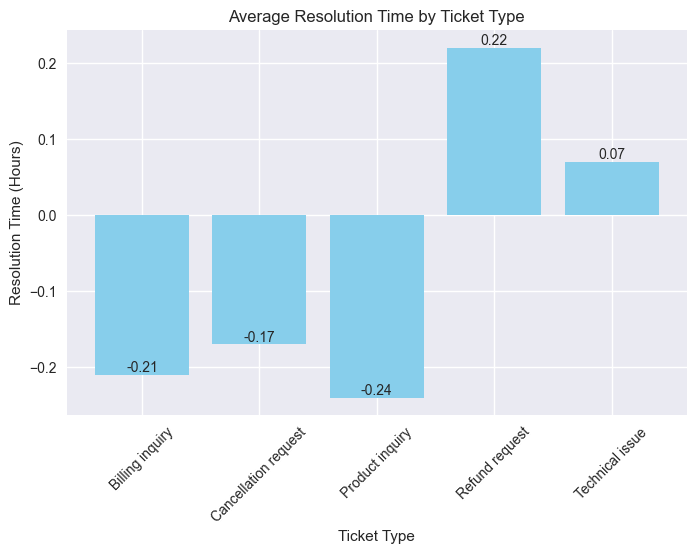

In [30]:
plt.figure(figsize=(8,5))
bars = plt.bar(avg_resolution_type.index,
               avg_resolution_type.values,
               color='skyblue')

plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             bar.get_height(),
             ha='center', va='bottom')

plt.show()


## High Priority Tickets – Resolution Time by Region
This analysis focuses on how quickly high-priority tickets are resolved across regions.


In [31]:
# Filter High Priority tickets
high_priority_df = df[df['Ticket Priority'] == 'High']

# Average Resolution Time by Region for High Priority
avg_high_priority_region = (
    high_priority_df.groupby('Region')['Resolution_Time']
    .mean()
    .round(2)
)

avg_high_priority_region


Region
East     0.97
North    0.17
South   -1.07
West    -0.45
Name: Resolution_Time, dtype: float64

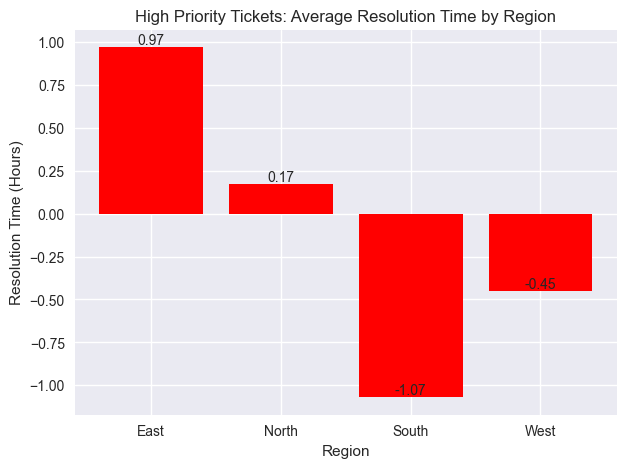

In [32]:
plt.figure(figsize=(7,5))
bars = plt.bar(avg_high_priority_region.index,
               avg_high_priority_region.values,
               color='red')

plt.title("High Priority Tickets: Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Resolution Time (Hours)")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             bar.get_height(),
             ha='center', va='bottom')

plt.show()


## High Priority Tickets – Resolution Time by Ticket Type
This analysis compares how different ticket types are resolved when priority is high.


In [33]:
# Average Resolution Time by Ticket Type for High Priority tickets
avg_high_priority_type = (
    high_priority_df.groupby('Ticket Type')['Resolution_Time']
    .mean()
    .round(2)
)

avg_high_priority_type


Ticket Type
Billing inquiry        -1.61
Cancellation request   -0.20
Product inquiry        -0.42
Refund request          1.44
Technical issue         0.14
Name: Resolution_Time, dtype: float64

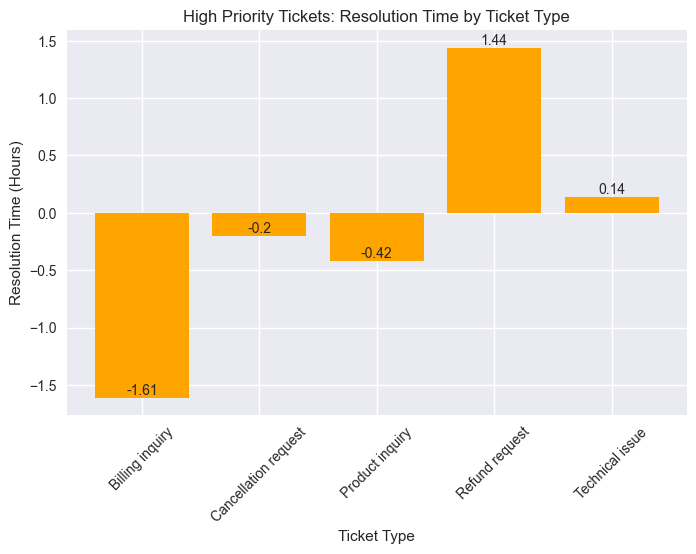

In [34]:
plt.figure(figsize=(8,5))
bars = plt.bar(avg_high_priority_type.index,
               avg_high_priority_type.values,
               color='orange')

plt.title("High Priority Tickets: Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             bar.get_height(),
             ha='center', va='bottom')

plt.show()


## Module 6

## Creating Derived Geographic Columns
The dataset does not contain geographic information such as region or latitude/longitude.
To perform geographic analysis, consistent derived columns are created and clearly documented.


In [36]:
# Create derived geographic columns (consistent mapping)

geo_map = {
    'Email': ('North', 28.6, 77.2),
    'Phone': ('South', 12.9, 77.6),
    'Chat': ('East', 22.6, 88.4),
    'Social media': ('West', 19.0, 72.8)
}

df[['Region', 'Latitude', 'Longitude']] = df['Ticket Channel'].apply(
    lambda x: pd.Series(geo_map.get(x))
)

df[['Ticket Channel', 'Region', 'Latitude', 'Longitude']].head()


,Ticket Channel,Region,Latitude,Longitude
0,Social media,West,19.0,72.8
1,Chat,East,22.6,88.4
2,Social media,West,19.0,72.8
3,Social media,West,19.0,72.8
4,Email,North,28.6,77.2


##  Ticket Count by Region
This step calculates how many tickets are raised in each region.


In [37]:
ticket_count_region = df['Region'].value_counts()
ticket_count_region


Region
North    2143
South    2132
West     2121
East     2073
Name: count, dtype: int64

##  Ticket Distribution by Region (Bar Chart)
This bar chart shows ticket concentration across regions.


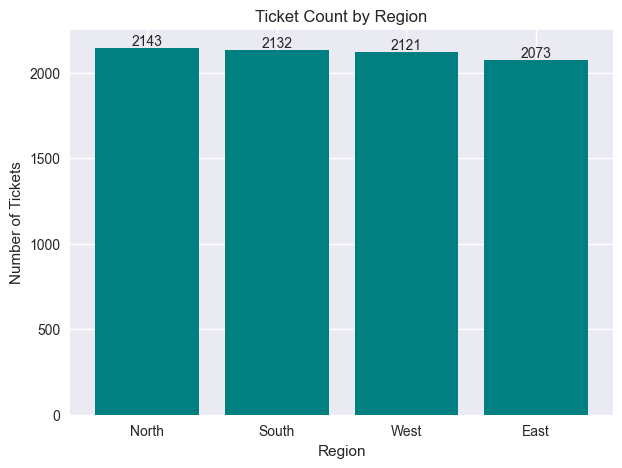

In [38]:
plt.figure(figsize=(7,5))
bars = plt.bar(ticket_count_region.index,
               ticket_count_region.values,
               color='teal')

plt.title("Ticket Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             bar.get_height(),
             ha='center', va='bottom')

plt.show()


##  Heatmap of Ticket Concentration by Region
This heatmap highlights regions with high and low ticket volume.


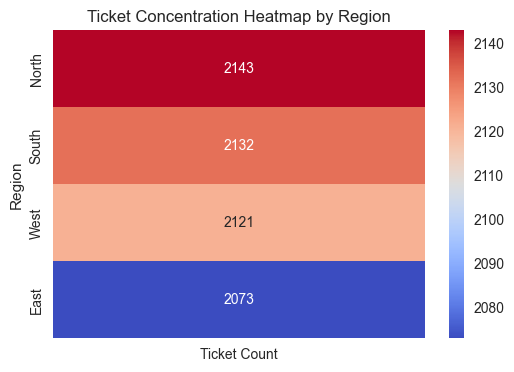

In [39]:
heatmap_data = ticket_count_region.to_frame(name='Ticket Count')

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt='d')
plt.title("Ticket Concentration Heatmap by Region")
plt.show()


##  Regional Ticket Volume Insights
This step identifies regions with the highest and lowest ticket volumes.


In [40]:
highest_region = ticket_count_region.idxmax()
lowest_region = ticket_count_region.idxmin()

highest_region, lowest_region


('North', 'East')

## Issue Categories Across Regions
This step analyzes how different issue categories are distributed across regions.


In [42]:
category_region_count = (
    df.groupby(['Region', 'Ticket Type'])
    .size()
    .unstack(fill_value=0)
)

category_region_count


Ticket Type,Billing inquiry,Cancellation request,Product inquiry,Refund request,Technical issue
Region,,,,,
East,398,408,388,426,453
North,405,448,427,455,408
South,434,426,424,427,421
West,397,413,402,444,465


## Comparative Chart of Issue Categories Across Regions
This chart compares issue categories region-wise.


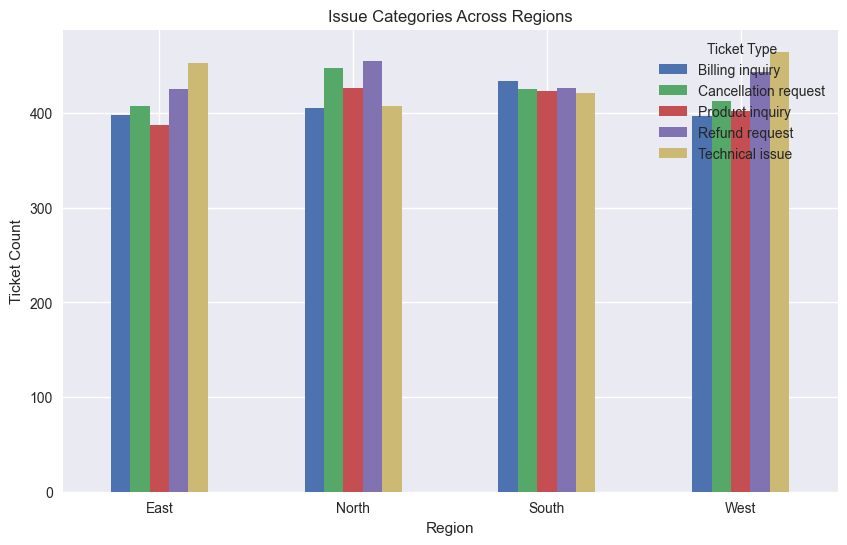

In [43]:
category_region_count.plot(kind='bar', figsize=(10,6))
plt.title("Issue Categories Across Regions")
plt.xlabel("Region")
plt.ylabel("Ticket Count")
plt.xticks(rotation=0)
plt.show()


## Geographic Mapping of Issue Categories
This scatter map visualizes issue categories geographically using latitude and longitude.


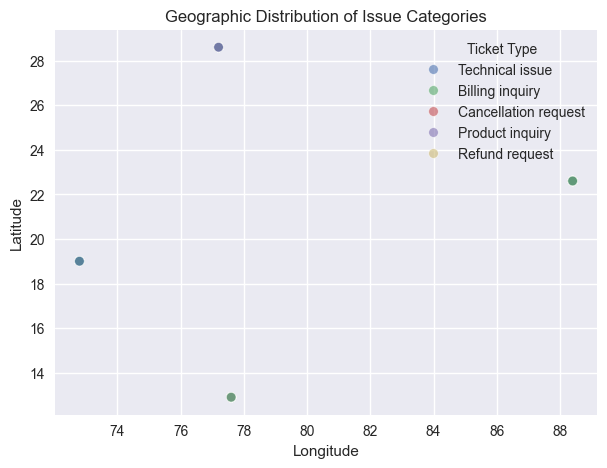

In [48]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='Ticket Type',
    alpha=0.6
)

plt.title("Geographic Distribution of Issue Categories")
plt.show()


##  Dominant Issue Categories by Region
This step identifies the most common issue category in each region.


In [45]:
dominant_category = category_region_count.idxmax(axis=1)
dominant_category


Region
East     Technical issue
North     Refund request
South    Billing inquiry
West     Technical issue
dtype: object

In [16]:
avg_resolution_by_region = (
    df.groupby('Region')['Resolution_Time']
      .mean()
      .round(2)
)
avg_resolution_by_region


Region
Chat            0.20
Email           0.01
Phone          -0.56
Social media    0.12
Name: Resolution_Time, dtype: float64

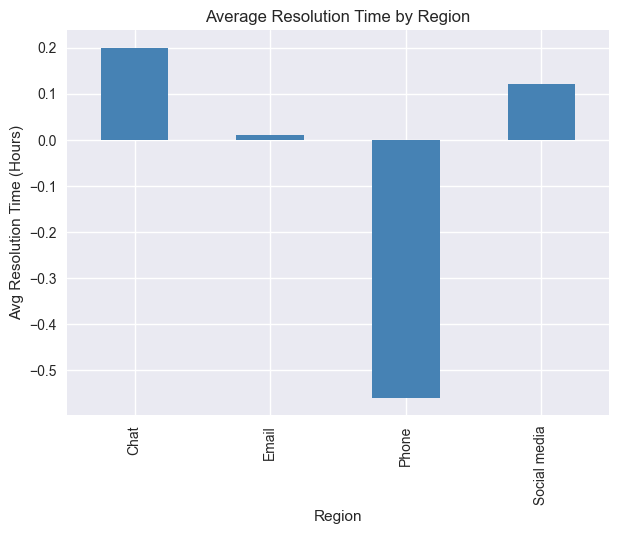

In [17]:
plt.figure(figsize=(7,5))
avg_resolution_by_region.plot(kind='bar', color='steelblue')
plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


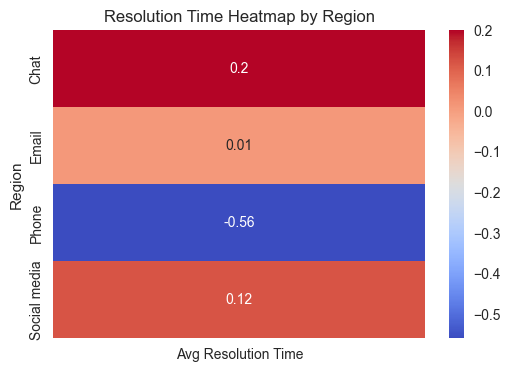

In [18]:
heatmap_data = avg_resolution_by_region.to_frame("Avg Resolution Time")

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Resolution Time Heatmap by Region")
plt.show()


In [19]:
ticket_volume_by_region = df['Region'].value_counts()
ticket_volume_by_region


Region
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

In [20]:
comparison_df = pd.DataFrame({
    'Ticket Volume': ticket_volume_by_region,
    'Avg Resolution Time': avg_resolution_by_region
})
comparison_df


,Ticket Volume,Avg Resolution Time
Region,,
Chat,2073,0.20
Email,2143,0.01
Phone,2132,-0.56
Social media,2121,0.12


In [21]:
cluster_size = df['Ticket Type'].value_counts()
cluster_size


Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [22]:
cluster_performance = (
    df.groupby('Ticket Type')['Resolution_Time']
      .mean()
      .round(2)
)
cluster_performance


Ticket Type
Billing inquiry        -0.21
Cancellation request   -0.17
Product inquiry        -0.24
Refund request          0.22
Technical issue         0.07
Name: Resolution_Time, dtype: float64

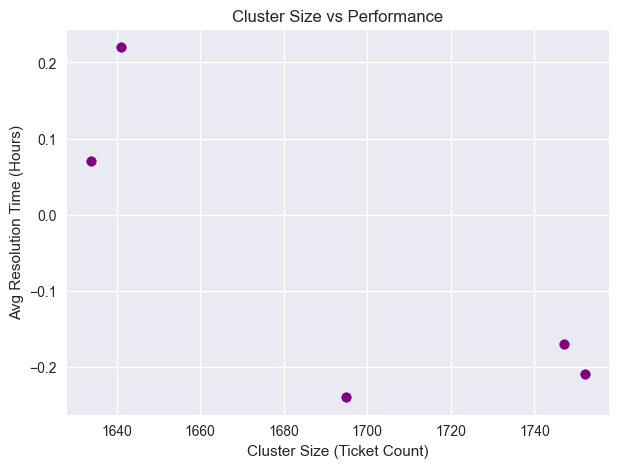

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(cluster_size, cluster_performance, color='purple')
plt.xlabel("Cluster Size (Ticket Count)")
plt.ylabel("Avg Resolution Time (Hours)")
plt.title("Cluster Size vs Performance")
plt.show()


In [24]:
cluster_summary = pd.DataFrame({
    'Cluster Size': cluster_size,
    'Avg Resolution Time': cluster_performance
})
cluster_summary


,Cluster Size,Avg Resolution Time
Ticket Type,,
Billing inquiry,1634,-0.21
Cancellation request,1695,-0.17
Product inquiry,1641,-0.24
Refund request,1752,0.22
Technical issue,1747,0.07


In [25]:
problem_clusters = cluster_summary.sort_values(
    by='Avg Resolution Time',
    ascending=False
)
problem_clusters


,Cluster Size,Avg Resolution Time
Ticket Type,,
Refund request,1752,0.22
Technical issue,1747,0.07
Cancellation request,1695,-0.17
Billing inquiry,1634,-0.21
Product inquiry,1641,-0.24
